Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All). Do NOT add any cells to the notebook!

Make sure you fill in any place that says `YOUR CODE HERE` or _YOUR ANSWER HERE_ , as well as your name and group below:

In [16]:
NAME = ""
STUDENTID = ""
GROUPID = "";

# Assignment 5 (Group)
In Assignment 2, as a group, you trained yourselves in accessing and characterising two data sources. You also sketched out a data-science project based on these data sources. In this assignment, based on this project idea, you should select, implement, and describe 3 appropriate visualisations.

The following materials provide the necessary background:
* the slide deck on visualisations (Unit 5) and the corresponding notebook;
* Chapter 3 of "Data Science from Scratch"
* the mandatory read on "Task-Based Effectiveness of Basic Visualizations" available from MyLearn: _B. Saket, A. Endert and Ç. Demiralp (2019), "Task-Based Effectiveness of Basic Visualizations," in IEEE Transactions on Visualization and Computer Graphics, vol. 25, no. 7, pp. 2505-2512, DOI: 10.1109/TVCG.2018.2829750_

Requirements:
* Required reading: Study the paper by Saket et al. (2019) and explicitly refer to the task types, pros & cons of different visualisations as identified by these authors when answering the questions on this assignment.
* The visualisation should be appropriate the chosen tasks on the data sets.
* You should use at least two different types of visualisations. Even if two tasks in two steps below were identical (e.g., two aggregation tasks), you would be expected to choose a different visualisation for each. 
* As contrast to Assignment 2, you will be expected to use `pandas` to represent and to prepare the data sets for visualisation.
* As for the data sets collected during Assignment 2, to avoid confusion:
  * Use the genuine ones, not the manipulated ones (having anomalies introduced). 
  * If you have worked with excerpts (samples) from the original and genuine datasets, you can continue to use these. You are also free to use the complete datasets, but this is not expected.
  * Please stick to your project description in Assignment 2 when choosing tasks and corresponding visualisations.

-----
## Step 1 (6 points)

Select, implement and describe one visualisation for data source 1 (in isolation from data source 2).

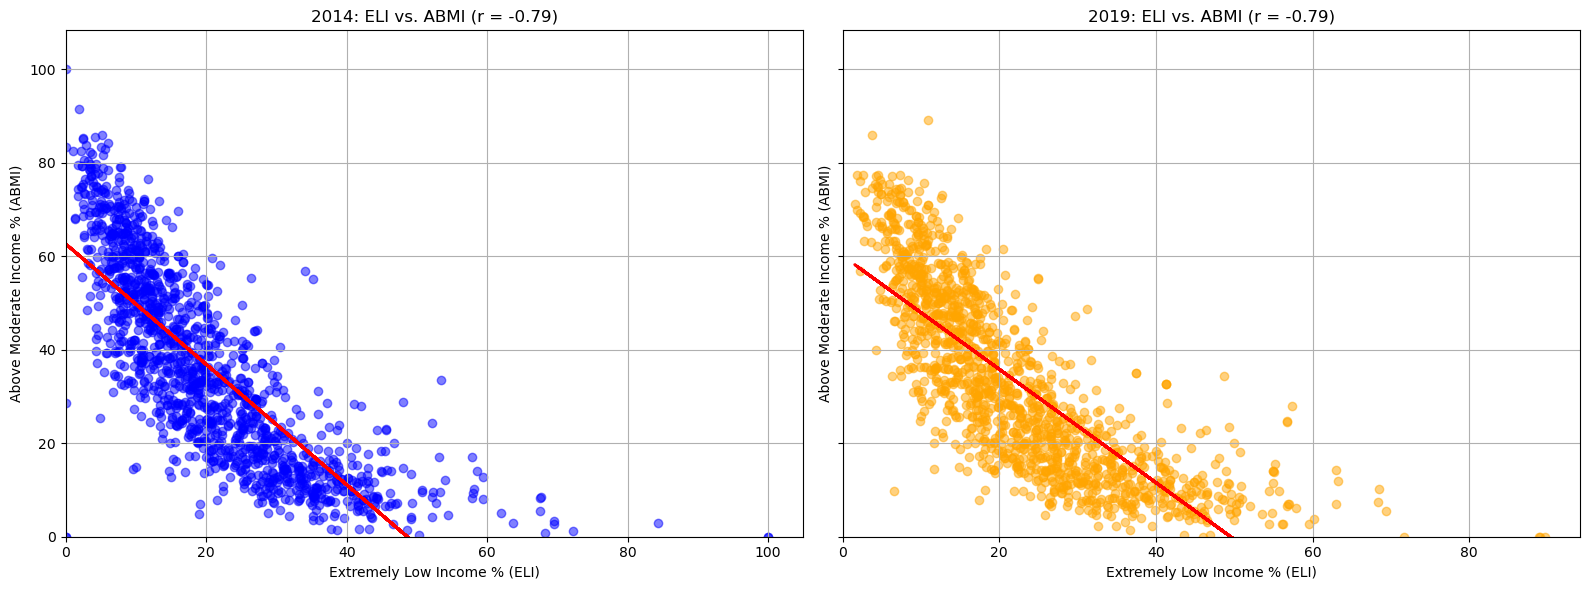

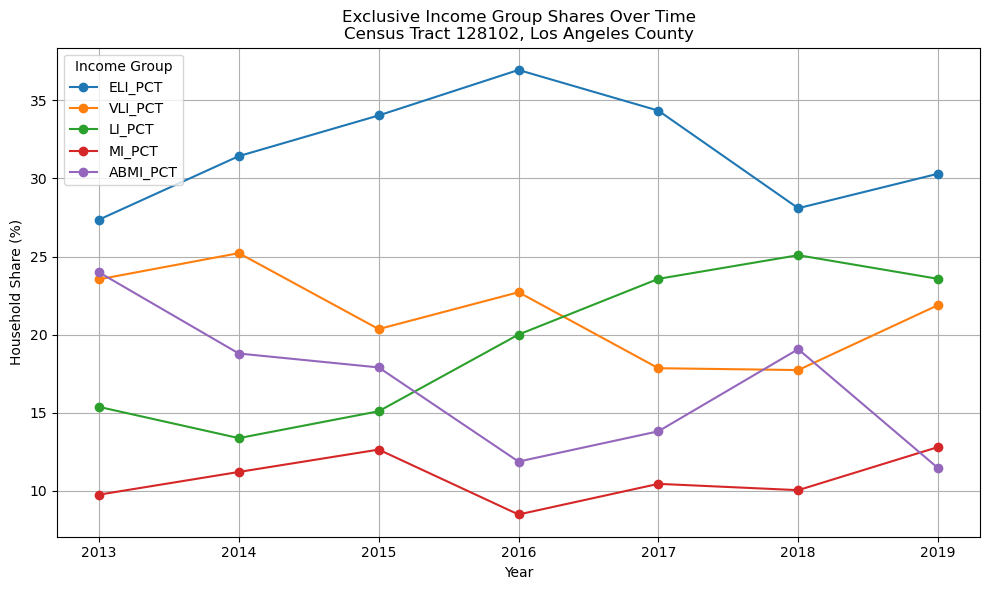

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the dataset
df = pd.read_csv("data/data_notebook-notebook-1_dataset1.csv")

# Define a function to plot ELI vs. ABMI with regression
def plot_eli_abmi(ax, year, color):
    
    """
    For a given year, plots:
      Scatter of ELI% vs. ABMI%
      Linear regression line
      Pearson correlation coefficient in the title

    Parameters:
      ax    – Matplotlib Axes object
      year  – Year to filter data (e.g. 2014, 2019)
      color – Color for the scatter points
    """
    
    # Filter for the specified year and drop missing values
    data = df[df['year'] == year][['eli_pct', 'abmi_pct']].dropna()
    x = data['eli_pct']
    y = data['abmi_pct']

    # Compute Pearson correlation coefficient
    r = x.corr(y)

    # Fit linear regression 
    m, b = np.polyfit(x, y, 1)

    # Plot scatter and regression line
    ax.scatter(x, y, alpha=0.5, color=color)
    ax.plot(x, m * x + b, color='red', linewidth=2)

    # Set labels, title, limits, and grid
    ax.set_title(f'{year}: ELI vs. ABMI (r = {r:.2f})')
    ax.set_xlabel('Extremely Low Income % (ELI)')
    ax.set_ylabel('Above Moderate Income % (ABMI)')
    ax.set_xlim(0, None)
    ax.set_ylim(0, None)
    ax.grid(True)

#  Create side-by-side plots for 2014 and 2019
fig, axes = plt.subplots(1, 2, figsize=(16, 6), sharey=True)
plot_eli_abmi(axes[0], 2014, color='blue')
plot_eli_abmi(axes[1], 2019, color='orange')
plt.tight_layout()
plt.show()

# Mapping & time series for exclusive income groups ---

#  Load mapping file and merge on geoid
mapping = pd.read_csv("data/census_tract_incomes.csv", dtype={'geo_id2': str})
df['geoid20'] = df['geoid20'].astype(str)
df = df.merge(mapping, left_on='geoid20', right_on='geo_id2', how='left')

#  Extract county name from the 'name' column (e.g. "Los Angeles County")
df['county'] = df['name'].str.extract(r',\s*(.*?) County')[0] + ' County'

#  Extract the 6-digit tract identifier from geoid20
df['tract_id'] = df['geoid20'].str[-6:]

#  Compute exclusive income group percentages:

df['ex_eli_pct']   = df['eli_pct']
df['ex_vli_pct']   = df['vli_pct'] - df['eli_pct']
df['ex_li_pct']    = df['li_pct'] - df['vli_pct']
df['ex_mi_pct']    = df['mi_pct'] - df['li_pct']
df['ex_abmi_pct']  = df['abmi_pct']

#  Select one census tract (e.g. tract 128102) and sort by year
tract_id    = '128102'
tract_data  = df[df['tract_id'] == tract_id].sort_values('year')

#  Plot time series of exclusive income shares
plt.figure(figsize=(10, 6))
for col in ['ex_eli_pct', 'ex_vli_pct', 'ex_li_pct', 'ex_mi_pct', 'ex_abmi_pct']:
    label = col.replace('ex_', '').upper()  # Converts 'ex_eli_pct' → 'ELI'
    plt.plot(
        tract_data['year'],
        tract_data[col],
        marker='o',
        label=label
    )

plt.title(f'Exclusive Income Group Shares Over Time\n'
          f'Census Tract {tract_id}, Los Angeles County')
plt.xlabel('Year')
plt.ylabel('Household Share (%)')
plt.legend(title='Income Group')
plt.grid(True)
plt.tight_layout()
plt.show()


Document your decision and describe the resulting visualisation. In your answer, cover the following aspects by referring explicitly to Saket et al. (2019):

* What is the task according to Saket et al. (2019) on the data source supported by the chosen visualisation?
* Why is the chosen visualisation effective for the given task?
* What does the visualisation show exactly?
* What does the visualisation contribute to answering your project's questions?

We classify our chart as a Characterize Distribution task—identifying how the distribution of each exclusive income group (ELI, VLI, LI, MI, ABMI) evolves over the years 2013–2019.

We chose a multi‑line chart because Saket et al. report that Line Charts outperform Bar Charts, Scatterplots, Tables, and Pie Charts on Distribution tasks: they enable precise reading of values along a common axis and clear comparison of multiple series over time.

We plot five lines—one per income group—over the x‑axis (years 2013–2019) against the y‑axis (percentage share of households). This lets us read each group’s exact share in any year and observe whether that share is rising, falling, or stable.

By revealing when and how each income group’s share shifts, we can pinpoint critical periods (e.g., peak ELI in 2016) to later correlate with crime trends. This alignment of socioeconomic and crime data grounds our segmentation and hypothesis testing in clear, time‑based evidence.

------
## Step 2 (6 points)

Select, implement and describe one visualisation for data source 2 (in isolation from data source 1).

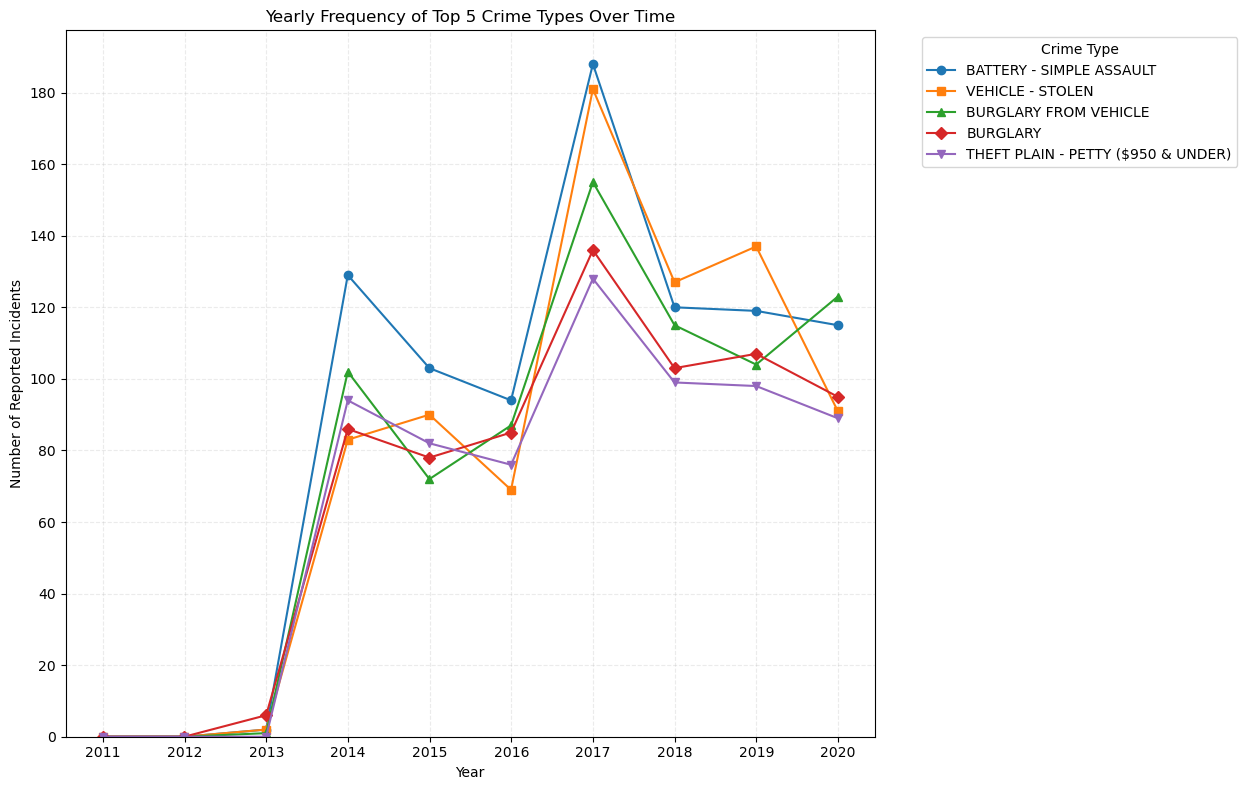

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import matplotlib.dates as mdates

# Data Input/Output and Validation 

def load_json(filepath):
    
    """
    Load a JSON file into a pandas DataFrame.
    Raises FileNotFoundError if the file does not exist.
    """
    
    return pd.read_json(filepath)


def ensure_columns(df, cols):
    
    """
    Ensure that DataFrame df contains all column names in cols.
    Raises KeyError listing any missing columns.
    """
    
    missing = [c for c in cols if c not in df.columns]
    if missing:
        raise KeyError(f"Missing required columns: {missing}")


# Date Conversion & Range Extraction

def convert_and_filter_dates(df, date_col):
    
    """
    Convert df[date_col] to datetime, coercing errors to NaT.
    Drops rows where conversion failed.
    Returns (clean_df, min_date, max_date).
    Raises ValueError if no valid dates remain.
    """
    
    df = df.copy()
    df[date_col] = pd.to_datetime(df[date_col], errors='coerce')
    valid = df.dropna(subset=[date_col])
    if valid.empty:
        raise ValueError(f"No valid dates in column '{date_col}'")
    return valid, valid[date_col].min(), valid[date_col].max()


# Top‑N Crime Extraction

def top_n_crimes(df, desc_col, n=5):
    
    """
    Compute the top-n most frequent values in df[desc_col].
    Returns a list of the top-n descriptions.
    Raises ValueError if desc_col is empty or all-NaN.
    """
    
    counts = df[desc_col].value_counts().dropna()
    if counts.empty:
        raise ValueError(f"No values found in '{desc_col}'")
    return counts.head(n).index.tolist()


# Aggregation & Pivoting

def aggregate_yearly_counts(df, date_col, desc_col, crime_list):
    
    """
    Group by year-end (freq='Y') and crime type, counting incidents.
    Returns a pivot table with DatetimeIndex of year-ends and one column per crime.
    Ensures all crime_list items appear as columns (zero-filled if absent).
    """
    
    #  Drop missing descriptions, set date index
    df = df.dropna(subset=[desc_col]).set_index(date_col)
    
    #  Filter to only the top crimes and count per year-end
    grouped = (
        df[df[desc_col].isin(crime_list)]
        .groupby([pd.Grouper(freq='Y'), desc_col])
        .size()
    )
    
    # Pivot to wide format, filling missing combinations with 0
    pivot = grouped.unstack(fill_value=0)
    
    # Reindex columns to match exactly the requested crime_list
    pivot = pivot.reindex(columns=crime_list, fill_value=0)
    return pivot


def reindex_yearly(pivot, start, end):
    
    """
    Reindex pivot to include every year-end between start & end.
    Missing years filled with zeros.
    """
    
    full_index = pd.date_range(start=start, end=end, freq='Y')
    return pivot.reindex(full_index, fill_value=0)


# Visualization 

def plot_crime_trends(pivot, crime_list):
    
    """
    Plot each crime’s yearly counts over time.
    Uses distinct markers, a legend to the right, and year‑only x‑axis.
    """
    
    fig, ax = plt.subplots(figsize=(15, 8))
    markers = ['o', 's', '^', 'D', 'v']
    for i, crime in enumerate(crime_list):
        ax.plot(
            pivot.index,
            pivot[crime],
            marker=markers[i % len(markers)],
            linewidth=1.5,
            label=crime
        )

    ax.set_title("Yearly Frequency of Top 5 Crime Types Over Time")
    ax.set_xlabel("Year")
    ax.set_ylabel("Number of Reported Incidents")
    ax.legend(title="Crime Type", bbox_to_anchor=(1.05, 1), loc='upper left')
    ax.grid(True, linestyle='--', alpha=0.25)
    ax.yaxis.set_major_locator(mticker.MaxNLocator(integer=True))
    ax.set_ylim(0, None)
    ax.xaxis.set_major_locator(mdates.YearLocator())
    ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y"))
    plt.xticks(rotation=0)
    plt.tight_layout(rect=[0, 0, 0.85, 1])
    plt.show()


#  Main Execution Flow 

def main():
    data_folder = "data"
    filename    = "data_notebook-notebook-1_dataset2.json"
    filepath    = os.path.join(data_folder, filename)

    try:
        # Load & validate
        df_raw = load_json(filepath)
        ensure_columns(df_raw, ['crm_cd_desc', 'date_occ'])

        # Convert dates & extract range
        df_dates, min_dt, max_dt = convert_and_filter_dates(df_raw, 'date_occ')

        # Identify top‑5 crimes over full range
        top5 = top_n_crimes(df_dates, 'crm_cd_desc', n=5)

        # Aggregate and pivot
        pivot = aggregate_yearly_counts(df_dates, 'date_occ', 'crm_cd_desc', top5)
        pivot = reindex_yearly(pivot, min_dt, max_dt)

        # Plot
        plot_crime_trends(pivot, top5)

    except FileNotFoundError:
        print(f"[ERROR] File not found: {filepath}")
    except KeyError as ke:
        print(f"[ERROR] {ke}")
    except ValueError as ve:
        print(f"[ERROR] {ve}")
    except Exception as e:
        print(f"[UNEXPECTED ERROR] {e}")
        traceback.print_exc()


if __name__ == "__main__":
    main()


Document your decision and describe the resulting visualisation. In your answer, cover the following aspects by referring explicitly to Saket et al. (2019):

* What is the task according to Saket et al. (2019) on the data source supported by the chosen visualisation?
* Why is the chosen visualisation effective for the given task?
* What does the visualisation show exactly?
* What does the visualisation contribute to answering your project's questions?

We classify our visualization as a Characterize Distribution task: we want to see how the annual counts of the top 5 crime types are distributed over the years 2010–2019.

We chose a line chart because Saket et al. report that line charts outperform bar charts, scatterplots, tables, and pie charts on Distribution tasks—line charts use position along a common axis, which makes it easy for us to compare exact values and trends across multiple series.

We plot five distinct colored lines—one per crime type—along the x‑axis (years 2010–2019) against the y‑axis (number of incidents). This lets us read, for example, that Battery – Simple Assault climbs from about 95 incidents in 2013 to about 188 in 2017, while Vehicle – Stolen and Burglary from Vehicle follow their own rise‑and‑fall patterns.

 By mapping out when and how each major crime category spikes or declines, we can align these crime trends with the socioeconomic shifts we observed in our income‑group analysis. That alignment allows us to test hypotheses about how changes in community wealth or poverty levels relate to changes in crime patterns.

-----
## Step 3  (7 points)

Merge the two data sets (or, relevant subsets thereof) based on your project idea from Assignment 2. Select, implement and describe one visualisation on the combined data set. Make sure you visualize variables taken from both original data sets.

Starting streamlined script...
Top 5 tracts by financial change: ['06037207400', '06037980011', '06037434004', '06037297601', '06037294110']
Loaded 10000 crimes, joined → 10000 records


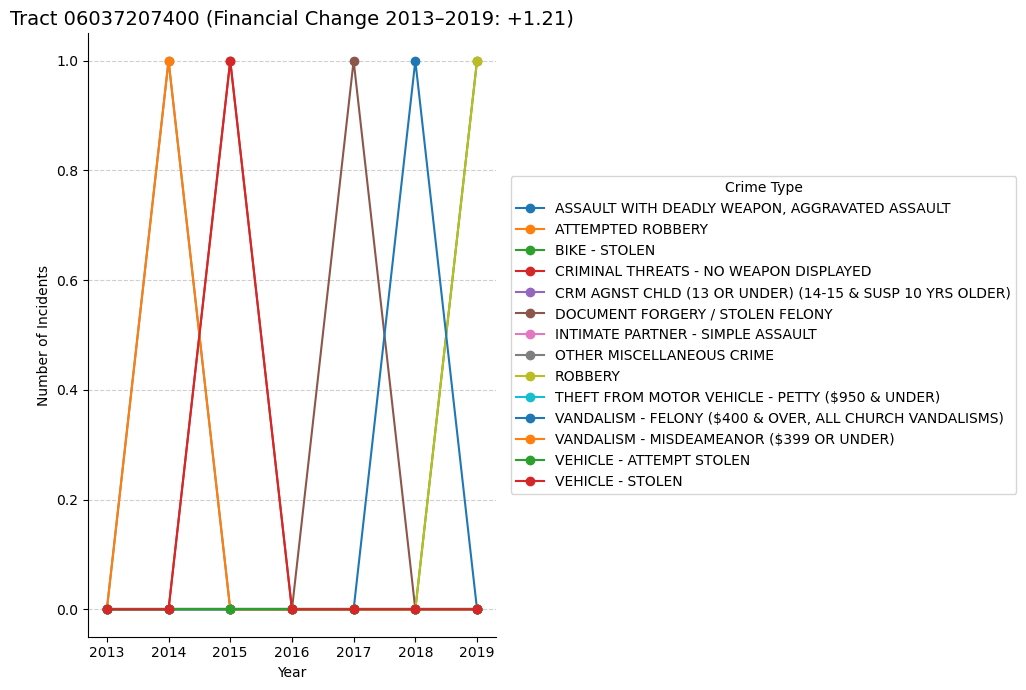

Skipping 06037980011: no crime data.
Skipping 06037434004: no crime data.


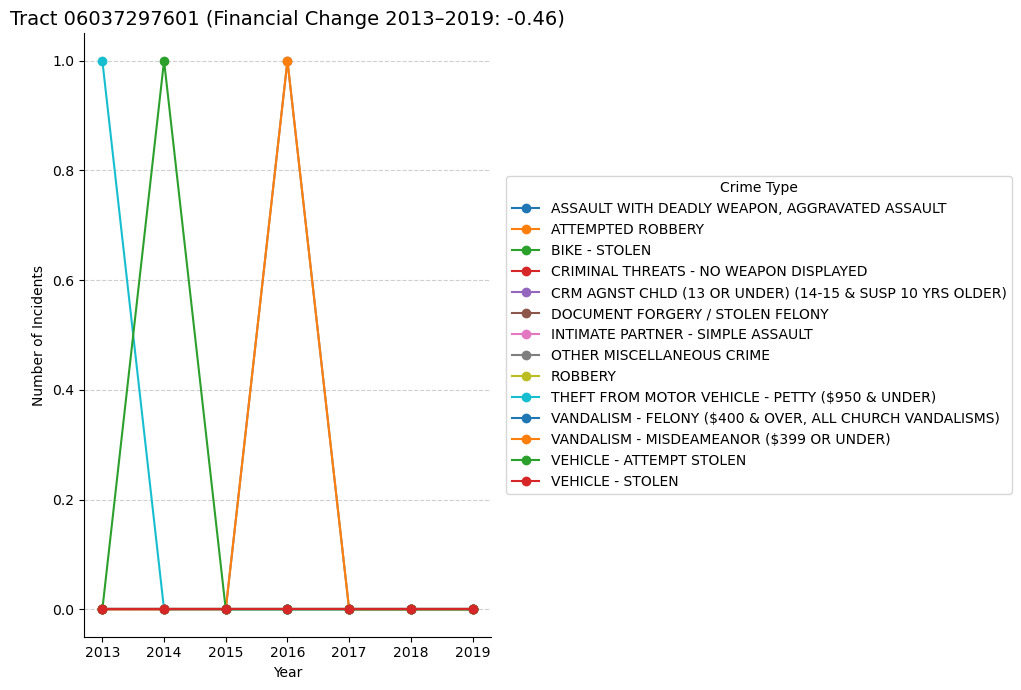

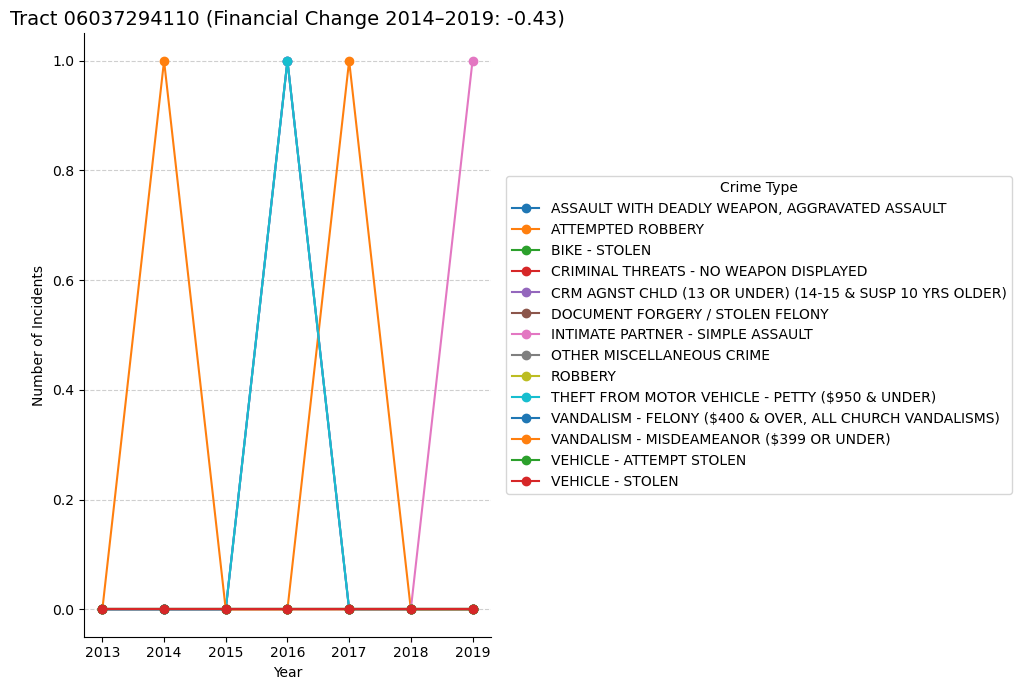

Script finished.


In [9]:
import json
import pathlib
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns


# Configuration

CWD                = pathlib.Path(os.getcwd())
DATA_DIR           = CWD / "data"
CRIME_JSON_PATH    = DATA_DIR / "data_notebook-notebook-1_dataset2.json"
CENTROIDS_CSV_PATH = DATA_DIR / "CA_tract_centroids_2020.csv.txt"
INCOME_CSV_PATH    = DATA_DIR / "data_notebook-notebook-1_dataset1.csv"
PROJECTED_CRS      = "EPSG:3310"            # California Albers
NUM_TOP_TRACTS     = 5
YEARS_TO_PLOT      = list(range(2013, 2020))

if not DATA_DIR.is_dir():
    raise FileNotFoundError(f"Data directory {DATA_DIR} not found.")



#  Financial Scores & Top-Changing Tracts

def load_centroids(path: pathlib.Path) -> pd.DataFrame:
    
    """
    Load census tract centroids, build a 11-digit GEOID string,
    and return a lookup DataFrame with geoid, LATITUDE, and LONGITUDE.
    """
    
    df = pd.read_csv(path, dtype=str)
    df['geoid'] = df['STATEFP'].str.zfill(2) \
                + df['COUNTYFP'].str.zfill(3) \
                + df['TRACTCE'].str.zfill(6)
    return df[['geoid', 'LATITUDE', 'LONGITUDE']].copy()


def compute_top_changing_tracts(path: pathlib.Path, n: int) -> pd.DataFrame:
    
    """
    1. Read income CSV.
    2. Compute exclusive income-group shares.
    3. Build a weighted financial score.
    4. Compute change between each tract’s first and last year.
    5. Return top-n tracts by absolute change, indexed by cleaned geoid,
       with columns [first_year, last_year, change].
    """
    
    df = pd.read_csv(path)
    
    # Exclusive group shares
    
    df['ex_eli_pct' ] = df['eli_pct']
    df['ex_vli_pct' ] = df['vli_pct']  - df['eli_pct']
    df['ex_li_pct'  ] = df['li_pct']  - df['vli_pct']
    df['ex_mi_pct'  ] = df['mi_pct']  - df['li_pct']
    df['ex_abmi_pct'] = df['abmi_pct']
    
    # Weighted score: from -1 (all ELI) to +1 (all ABMI)
    
    weights = {'ex_eli_pct': -1.0, 'ex_vli_pct': -0.5,
               'ex_li_pct':  0.0, 'ex_mi_pct':  0.5,
               'ex_abmi_pct': 1.0}
    df['financial_score'] = sum(df[col] * w for col, w in weights.items()) / 100

    # Clean and sort by tract and year
    
    df['year'] = pd.to_numeric(df['year'], errors='coerce').astype(int)
    df = df.sort_values(['geoid', 'year'])
    # First & last score per tract
    
    first = df.loc[df.groupby('geoid')['year'].idxmin()]
    last  = df.loc[df.groupby('geoid')['year'].idxmax()]
    merged = pd.merge(
        first[['geoid','financial_score','year']].rename(columns={
            'financial_score':'first_score','year':'first_year'
        }),
        last [['geoid','financial_score','year']].rename(columns={
            'financial_score':'last_score','year':'last_year'
        }),
        on='geoid'
    )
    # Exclude tracts with only one year of data
    
    merged = merged[merged['first_year'] != merged['last_year']].copy()
    merged['change'] = merged['last_score'] - merged['first_score']

    # Select top-n by absolute change
    
    merged = merged.reindex(
        merged['change'].abs().sort_values(ascending=False).index
    ).head(n)

    # Clean up GEOID (ensure exactly 11 digits)
    
    merged['geoid'] = merged['geoid'].astype(str).str.extract(r'(\d{11})')[0]
    return merged.set_index('geoid')[['first_year','last_year','change']]



# Crime Data + Spatial Join

def load_and_clean_crime_json(path: pathlib.Path) -> pd.DataFrame:
    
    """
    Read a JSON (or newline‑delimited JSON) of crime records,
    lowercase column names, convert lat/lon to numeric, and drop invalid coords.
    """
    
    with open(path, 'r') as f:
        try:
            data = json.load(f)
        except json.JSONDecodeError:
            data = [json.loads(line) for line in f if line.strip()]

    df = pd.DataFrame(data)
    
    # Standardize and clean coordinates
    
    df.rename(columns=str.lower, inplace=True)
    df['lat'] = pd.to_numeric(df['lat'], errors='coerce')
    df['lon'] = pd.to_numeric(df['lon'], errors='coerce')
    return df.dropna(subset=['lat','lon'])


def spatially_join_crime_to_tracts(
    crime_df: pd.DataFrame,
    centroids_df: pd.DataFrame
) -> gpd.GeoDataFrame:
    
    """
    1. Build GeoDataFrames for crimes and tract centroids.
    2. Reproject both to PROJECTED_CRS.
    3. Perform a nearest‑neighbor spatial join to tag each crime with its tract GEOID.
    """
    
    # Create GeoDataFrames in WGS84
    crime_gdf     = gpd.GeoDataFrame(
        crime_df,
        geometry=gpd.points_from_xy(crime_df.lon, crime_df.lat),
        crs="EPSG:4326"
    )
    centroids_gdf = gpd.GeoDataFrame(
        centroids_df,
        geometry=gpd.points_from_xy(
            centroids_df.LONGITUDE, centroids_df.LATITUDE
        ),
        crs="EPSG:4326"
    )

    # Reproject both
    crime_proj     = crime_gdf.to_crs(PROJECTED_CRS)
    centroids_proj = centroids_gdf.to_crs(PROJECTED_CRS).reset_index(drop=True)

    # Nearest‑neighbor join (adds index_right)
    joined = gpd.sjoin_nearest(
        crime_proj,
        centroids_proj[['geometry']],
        how='left'
    )
    # Merge in the geoid from centroids
    return joined.merge(
        centroids_proj[['geoid']],
        left_on='index_right',
        right_index=True,
        how='left'
    )



# Pivot & Plot per Tract

def prepare_crime_counts(
    gdf: gpd.GeoDataFrame,
    top_geoids: list
) -> pd.DataFrame:
    
    """
    1. Parse date_occ to datetime, drop invalids, extract year.
    2. Filter to only the specified top_geoids.
    3. Fill missing descriptions and count incidents per (geoid,year,crm_cd_desc).
    4. Pivot to a wide table indexed by [geoid, year].
    """
    
    df = gdf.copy()
    df['date_occ'] = pd.to_datetime(df['date_occ'], errors='coerce')
    df = df.dropna(subset=['date_occ'])
    df['year'] = df['date_occ'].dt.year
    df['crm_cd_desc'] = df['crm_cd_desc'].fillna('UNKNOWN').str.strip()
    df = df[df['geoid'].isin(top_geoids)]

    grouped = (
        df.groupby(['geoid', 'year', 'crm_cd_desc'])
          .size()
          .reset_index(name='count')
    )
    pivot = grouped.pivot_table(
        index=['geoid', 'year'],
        columns='crm_cd_desc',
        values='count',
        fill_value=0
    )
    return pivot


def plot_tract_trends(
    counts: pd.DataFrame,
    info: pd.DataFrame,
    years: list
):
    
    """
    For each tract in counts, reindex to the full year list (zero‑fill),
    then plot each crime type’s time series alongside the tract’s financial change.
    """
    
    for geoid in info.index:
        if geoid not in counts.index.get_level_values('geoid'):
            print(f"Skipping {geoid}: no crime data.")
            continue

        # Extract and reindex crime counts for this tract
        crime_pivot = counts.loc[geoid].reindex(years, fill_value=0)

        # Title with financial change summary
        row = info.loc[geoid]
        title = (
            f"Tract {geoid} (Financial Change "
            f"{int(row.first_year)}–{int(row.last_year)}: {row.change:+.2f})"
        )

        plt.figure(figsize=(12, 7))
        palette = sns.color_palette("tab10", n_colors=len(crime_pivot.columns))
        for i, crime_type in enumerate(crime_pivot.columns):
            plt.plot(
                crime_pivot.index,
                crime_pivot[crime_type],
                marker='o',
                label=crime_type,
                color=palette[i]
            )

        plt.title(title, fontsize=14)
        plt.xlabel("Year")
        plt.ylabel("Number of Incidents")
        plt.xticks(years)
        plt.grid(axis='y', linestyle='--', alpha=0.6)
        plt.legend(
            title="Crime Type",
            loc="center left",
            bbox_to_anchor=(1.02, 0.5)
        )
        plt.tight_layout(rect=[0, 0, 0.85, 1])
        sns.despine()
        plt.show()



# Main Execution

def main():
    print("Starting streamlined script...")

    # Financial data → top changers
    
    centroids_lookup = load_centroids(CENTROIDS_CSV_PATH)
    top_info         = compute_top_changing_tracts(INCOME_CSV_PATH, NUM_TOP_TRACTS)
    top_geoids       = top_info.index.tolist()
    print(f"Top {len(top_geoids)} tracts by financial change: {top_geoids}")

    # Crime data → spatial join
    
    crime_df       = load_and_clean_crime_json(CRIME_JSON_PATH)
    crimes_with_geoid = spatially_join_crime_to_tracts(crime_df, centroids_lookup)
    print(f"Loaded {len(crime_df)} crimes, joined → {len(crimes_with_geoid)} records")

    # Pivot counts & plot per tract
    
    all_counts = prepare_crime_counts(crimes_with_geoid, top_geoids)
    plot_tract_trends(all_counts, top_info, YEARS_TO_PLOT)

    print("Script finished.")

if __name__ == "__main__":
    main()


Document your decision and describe the resulting visualisation. In your answer, cover the following aspects by referring explicitly to Saket et al. (2019):

* What is the task according to Saket et al. (2019) on the combined data set supported by the chosen visualisation?
* Why is the chosen visualisation effective for the given task?
* What does the visualisation show exactly?
* What does the visualisation contribute to answering your project's questions?

We treat our multi‐tract, multi‐series line chart as a Characterize Distribution task—identifying how the counts of each major crime type are distributed over time for each census tract—and as a Find Correlation task—inspecting whether the direction and magnitude of financial score change (annotated in the title) align with rising or falling crime trends.

By plotting each crime type’s annual count as a distinct line, we can precisely compare peaks and valleys year‑to‑year, and by placing the financial score change in the title, we immediately contextualize those trends against socioeconomic shifts.

For each of our top 5 tracts, we draw one line per crime category over the years 2013–2019 (y‑axis: reported incidents). In the plot title we display the tract’s net financial score change between its first and last observed years. For example, GEOID "06037207400" shows a +1.21 score change alongside its crime time series, letting us see whether crime counts rose, fell, or remained flat in the period of economic improvement.

Our project investigates how socioeconomic change co‑occurs with crime patterns. These combined plots let us visually align each tract’s financial improvement or decline with the timing and magnitude of crime fluctuations. That alignment generates hypotheses—e.g., “Did a +1.21 gain in financial score coincide with a downturn in assaults?”—which we can then test quantitatively, grounding our segmentation and modeling in clear, task‐appropriate evidence.

-----
## Step 4  (1 points)

Persist the merged dataset from Step 3 as a file.

In [14]:
# Re‑run spatial join (to guarantee `crimes_with_geoid` exists)

centroids_lookup = load_centroids(CENTROIDS_CSV_PATH)        # from  Part 1 code
crime_df          = load_and_clean_crime_json(CRIME_JSON_PATH)  #  Part 2 loader

# This defines `crimes_with_geoid`
crimes_with_geoid = spatially_join_crime_to_tracts(crime_df, centroids_lookup)


# Persist merged crime+GEOID dataset to CSV

# Drop the GeoDataFrame’s geometry column so it can be written as plain CSV
merged_df = crimes_with_geoid.drop(columns="geometry").copy()

# Build the output filename
output_path = DATA_DIR / "merged_crime_geoid_dataset.csv"

# Write to disk without row indices
merged_df.to_csv(output_path, index=False)

print(f"Merged dataset saved to: {output_path}")


#raise NotImplementedError()

Merged dataset saved to: /home/jovyan/My materials/Data Processing/Assignment5/SUB/data/merged_crime_geoid_dataset.csv
